### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the data

In [3]:
df = pd.read_csv('all_match_results.csv', index_col=0)
df.head()

,HomeTeam,Result,AwayTeam
Date,,,
13-Aug-2021,Brentford,2:0,Arsenal
14-Aug-2021,Burnley,1:2,Brighton and Hove Albion
14-Aug-2021,Chelsea,3:0,Crystal Palace
14-Aug-2021,Everton,3:1,Southampton
14-Aug-2021,Leicester City,1:0,Wolverhampton Wanderers


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 13-Aug-2021 to 22-May-2022
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   Result    380 non-null    object
 2   AwayTeam  380 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [10]:
df.isna().sum()

HomeTeam    0
Result      0
AwayTeam    0
dtype: int64

In [11]:
df.shape

(380, 3)

### Lets work on the results

In [22]:
df['Result'] = df['Result'].astype('category')

In [24]:

df['Result'].dtypes

CategoricalDtype(categories=['0:0', '0:1', '0:2', '0:3', '0:4', '0:5', '0:6', '1:0',
                  '1:1', '1:2', '1:3', '1:4', '1:5', '2:0', '2:1', '2:2',
                  '2:3', '2:4', '2:5', '3:0', '3:1', '3:2', '3:3', '4:0',
                  '4:1', '4:2', '5:0', '5:1', '6:0', '6:3', '7:0'],
, ordered=False)

### Create goals column from results column

In [56]:
df['goals'] = df['Result'].str.split(':',n=-1, expand=False)
df.head()

,HomeTeam,Result,AwayTeam,goals
Date,,,,
13-Aug-2021,Brentford,2:0,Arsenal,"[2, 0]"
14-Aug-2021,Burnley,1:2,Brighton and Hove Albion,"[1, 2]"
14-Aug-2021,Chelsea,3:0,Crystal Palace,"[3, 0]"
14-Aug-2021,Everton,3:1,Southampton,"[3, 1]"
14-Aug-2021,Leicester City,1:0,Wolverhampton Wanderers,"[1, 0]"


### Create home_goals and away_goals columns from goals column

In [62]:
df['home_goals']=[x[0] for x in df['goals']]

In [65]:
df['away_goals'] = [x[1] for x in df['goals']]

In [66]:
df.head()

,HomeTeam,Result,AwayTeam,goals,home_goals,away_goals
Date,,,,,,
13-Aug-2021,Brentford,2:0,Arsenal,"[2, 0]",2,0
14-Aug-2021,Burnley,1:2,Brighton and Hove Albion,"[1, 2]",1,2
14-Aug-2021,Chelsea,3:0,Crystal Palace,"[3, 0]",3,0
14-Aug-2021,Everton,3:1,Southampton,"[3, 1]",3,1
14-Aug-2021,Leicester City,1:0,Wolverhampton Wanderers,"[1, 0]",1,0


In [67]:
## Save the dataset
df.to_csv('EPL_matches_results.csv')

In [68]:
data = df.copy()

### Let's drop the columns that are not needed
**Results column and goals column

In [69]:
data.drop(['Result', 'goals'],axis=1, inplace=True)

In [70]:
data.head()

,HomeTeam,AwayTeam,home_goals,away_goals
Date,,,,
13-Aug-2021,Brentford,Arsenal,2,0
14-Aug-2021,Burnley,Brighton and Hove Albion,1,2
14-Aug-2021,Chelsea,Crystal Palace,3,0
14-Aug-2021,Everton,Southampton,3,1
14-Aug-2021,Leicester City,Wolverhampton Wanderers,1,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 13-Aug-2021 to 22-May-2022
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HomeTeam    380 non-null    object
 1   AwayTeam    380 non-null    object
 2   home_goals  380 non-null    object
 3   away_goals  380 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


### Convert home_goals and away_goals to numerical variables

In [74]:
data['home_goals'] = data['home_goals'].astype('int')
data['away_goals'] = data['away_goals'].astype('int')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 13-Aug-2021 to 22-May-2022
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HomeTeam    380 non-null    object
 1   AwayTeam    380 non-null    object
 2   home_goals  380 non-null    int32 
 3   away_goals  380 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 20.0+ KB


In [77]:
# create column for date
data['Date'] = data.index

In [78]:
data.head()

,HomeTeam,AwayTeam,home_goals,away_goals,Date
Date,,,,,
13-Aug-2021,Brentford,Arsenal,2,0,13-Aug-2021
14-Aug-2021,Burnley,Brighton and Hove Albion,1,2,14-Aug-2021
14-Aug-2021,Chelsea,Crystal Palace,3,0,14-Aug-2021
14-Aug-2021,Everton,Southampton,3,1,14-Aug-2021
14-Aug-2021,Leicester City,Wolverhampton Wanderers,1,0,14-Aug-2021


In [80]:
data['Date'] = pd.to_datetime(data['Date'])

In [81]:
data['Month'] = data['Date'].apply(lambda t: t.month)

In [88]:
data.head()

,HomeTeam,AwayTeam,home_goals,away_goals,Date,Month
Date,,,,,,
13-Aug-2021,Brentford,Arsenal,2,0,2021-08-13,8
14-Aug-2021,Burnley,Brighton and Hove Albion,1,2,2021-08-14,8
14-Aug-2021,Chelsea,Crystal Palace,3,0,2021-08-14,8
14-Aug-2021,Everton,Southampton,3,1,2021-08-14,8
14-Aug-2021,Leicester City,Wolverhampton Wanderers,1,0,2021-08-14,8


### EDA

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7936\1079900522.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['Date']).sum()['home_goals'].plot(figsize=(8,4), grid=True)


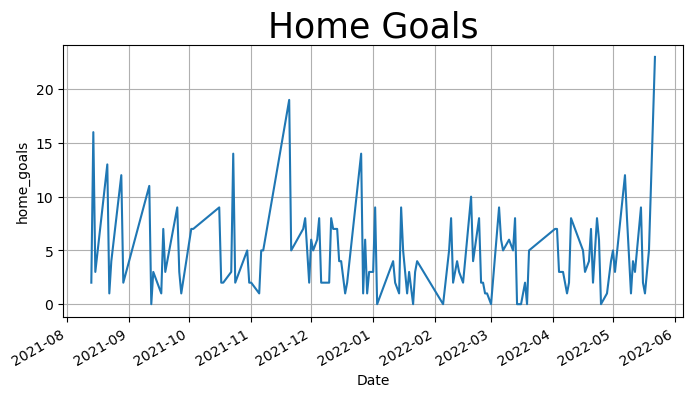

In [118]:
plt.style.use('default')
data.groupby(data['Date']).sum()['home_goals'].plot(figsize=(8,4), grid=True)
plt.ylabel('home_goals')
plt.title('Home Goals', size=25)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7936\1302652055.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['Date']).sum()['away_goals'].plot(figsize=(8,4), grid=True)


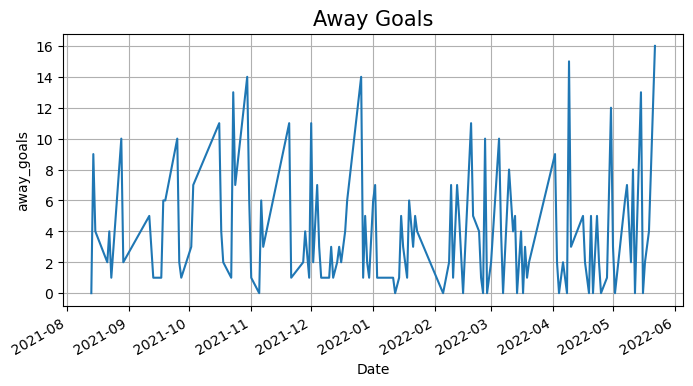

In [119]:
plt.style.use('default')
data.groupby(data['Date']).sum()['away_goals'].plot(figsize=(8,4), grid=True)
plt.ylabel('away_goals')
plt.title('Away Goals',size=15)
plt.show()

#### Sum of Goals scored in each month

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7936\2583703412.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Month').sum()['home_goals'].plot(figsize=(8,4),grid=True, color='orange')


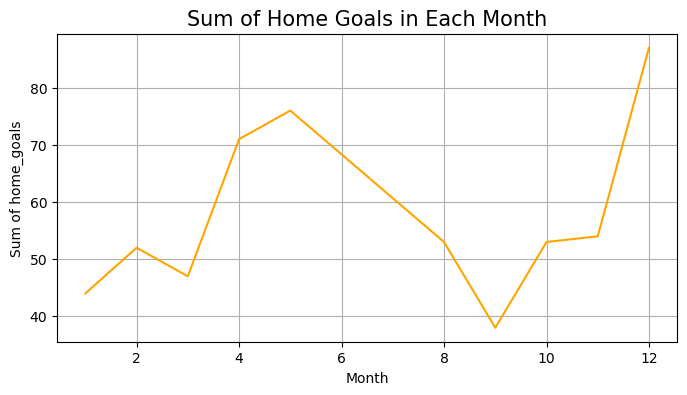

In [125]:
plt.style.use('default')
data.groupby('Month').sum()['home_goals'].plot(figsize=(8,4),grid=True, color='orange')
plt.ylabel('Sum of home_goals')
plt.title('Sum of Home Goals in Each Month', size=15)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7936\4091868514.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Month').sum()['away_goals'].plot(figsize=(8,4),grid=True, color='green')


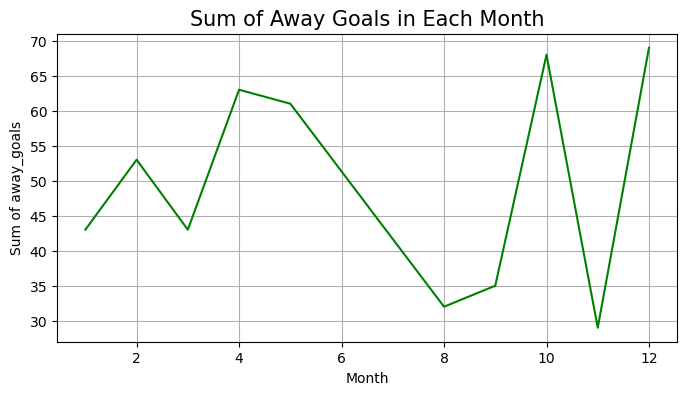

In [126]:
plt.style.use('default')
data.groupby('Month').sum()['away_goals'].plot(figsize=(8,4),grid=True, color='green')
plt.ylabel('Sum of away_goals')
plt.title('Sum of Away Goals in Each Month', size=15)
plt.show()

## Prepare the data for Machine learning

In [127]:
data1 = data.copy()

In [128]:
data1.head()

,HomeTeam,AwayTeam,home_goals,away_goals,Date,Month
Date,,,,,,
13-Aug-2021,Brentford,Arsenal,2,0,2021-08-13,8
14-Aug-2021,Burnley,Brighton and Hove Albion,1,2,2021-08-14,8
14-Aug-2021,Chelsea,Crystal Palace,3,0,2021-08-14,8
14-Aug-2021,Everton,Southampton,3,1,2021-08-14,8
14-Aug-2021,Leicester City,Wolverhampton Wanderers,1,0,2021-08-14,8


### Lets create Results column from the home and away goals

In [171]:
data1['result'] = np.where((data1['home_goals'] > data1['away_goals']) & (data1['away_goals'] < data1['home_goals']),'H','A')

** H represent Home team wins

** A represent Away team wins

** All Draws are seens as Away win

In [158]:
data1.tail(10)

,HomeTeam,AwayTeam,home_goals,away_goals,Date,Month,result
Date,,,,,,,
22-May-2022,Arsenal,Everton,5,1,2022-05-22,5,H
22-May-2022,Brentford,Leeds United,1,2,2022-05-22,5,A
22-May-2022,Brighton and Hove Albion,West Ham United,3,1,2022-05-22,5,H
22-May-2022,Burnley,Newcastle United,1,2,2022-05-22,5,A
22-May-2022,Chelsea,Watford,2,1,2022-05-22,5,H
22-May-2022,Crystal Palace,Manchester United,1,0,2022-05-22,5,H
22-May-2022,Leicester City,Southampton,4,1,2022-05-22,5,H
22-May-2022,Liverpool,Wolverhampton Wanderers,3,1,2022-05-22,5,H
22-May-2022,Manchester City,Aston Villa,3,2,2022-05-22,5,H


In [183]:
data1.to_csv('matches_data.csv')

The data has been modified because of the Draw and Away win error

### Read the data 

In [184]:
matches = pd.read_csv('matches_data.csv')
matches.head()

,Date,HomeTeam,AwayTeam,home_goals,away_goals,Date.1,Month,result,results
0,13-Aug-21,Brentford,Arsenal,2,0,8/13/2021,8,H,H
1,14-Aug-21,Burnley,Brighton and Hove Albion,1,2,8/14/2021,8,A,A
2,14-Aug-21,Chelsea,Crystal Palace,3,0,8/14/2021,8,H,H
3,14-Aug-21,Everton,Southampton,3,1,8/14/2021,8,H,H
4,14-Aug-21,Leicester City,Wolverhampton Wanderers,1,0,8/14/2021,8,H,H


In [185]:
matches.drop(['result'],axis=1, inplace=True)

In [186]:
matches.head()

,Date,HomeTeam,AwayTeam,home_goals,away_goals,Date.1,Month,results
0,13-Aug-21,Brentford,Arsenal,2,0,8/13/2021,8,H
1,14-Aug-21,Burnley,Brighton and Hove Albion,1,2,8/14/2021,8,A
2,14-Aug-21,Chelsea,Crystal Palace,3,0,8/14/2021,8,H
3,14-Aug-21,Everton,Southampton,3,1,8/14/2021,8,H
4,14-Aug-21,Leicester City,Wolverhampton Wanderers,1,0,8/14/2021,8,H


In [187]:
matches.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'home_goals', 'away_goals', 'Date.1',
       'Month', 'results'],
      dtype='object')

In [188]:
# Drop Date.1
matches.drop(['Date.1'],axis=1,inplace=True)

In [189]:
matches.head()

,Date,HomeTeam,AwayTeam,home_goals,away_goals,Month,results
0,13-Aug-21,Brentford,Arsenal,2,0,8,H
1,14-Aug-21,Burnley,Brighton and Hove Albion,1,2,8,A
2,14-Aug-21,Chelsea,Crystal Palace,3,0,8,H
3,14-Aug-21,Everton,Southampton,3,1,8,H
4,14-Aug-21,Leicester City,Wolverhampton Wanderers,1,0,8,H


In [192]:
matches['results'].value_counts()

H    163
A    129
D     88
Name: results, dtype: int64

In [190]:
# Save the dataset
matches.to_csv('EPL_matches_csv')

## Data Encoding

In [191]:
df1 = matches.copy()

In [193]:
# Convert category to numerical
df1['HomeTeam'] = df1['HomeTeam'].astype('category').cat.codes
df1['AwayTeam'] = df1['AwayTeam'].astype('category').cat.codes
df1['results'] = df1['results'].astype('category').cat.codes

In [194]:
df1.head()

,Date,HomeTeam,AwayTeam,home_goals,away_goals,Month,results
0,13-Aug-21,2,0,2,0,8,2
1,14-Aug-21,4,3,1,2,8,0
2,14-Aug-21,5,6,3,0,8,2
3,14-Aug-21,7,15,3,1,8,2
4,14-Aug-21,9,19,1,0,8,2


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7936\3547218311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

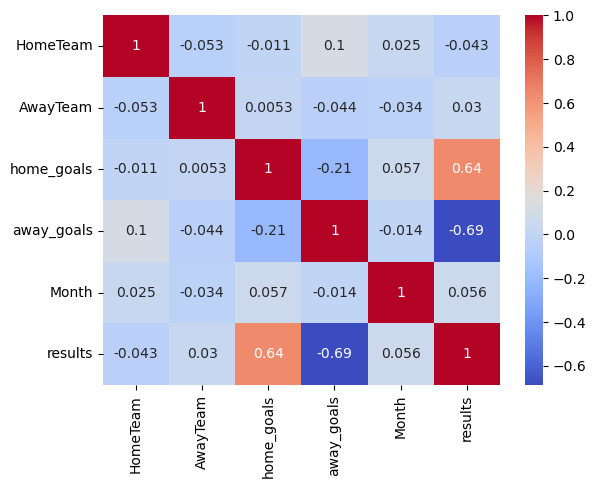

In [197]:
## Check variable relationship
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

## Select Feature and Target set of the data

In [198]:
# X = Feature
# Y = Target

X = df1.iloc[:,1:-1]
Y= df1.iloc[:,-1]

In [200]:
X.head()

,HomeTeam,AwayTeam,home_goals,away_goals,Month
0,2,0,2,0,8
1,4,3,1,2,8
2,5,6,3,0,8
3,7,15,3,1,8
4,9,19,1,0,8


In [201]:
Y.head()

0    2
1    0
2    2
3    2
4    2
Name: results, dtype: int8

### Train Test Split


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

In [204]:
x_train.shape, y_train.shape

((266, 5), (266,))

In [205]:
x_test.shape,y_test.shape

((114, 5), (114,))

### List of ML Classification Algorithms

** RandomForestClassifier() 

** Support Vector Classifier()

** Logistic Regression

## 1. RandomForest Model

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rfc_model = RandomForestClassifier(random_state=2)

### Train the model

In [208]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

### Predictions and Evaluations

In [209]:
rfc_pred = rfc_model.predict(x_test)

In [210]:
from sklearn.metrics import classification_report

In [211]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.97      0.97      0.97        30
           2       1.00      0.98      0.99        50

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## The model has an Accuracy of 98%

In [212]:
pd.crosstab(y_test,rfc_pred)

col_0,0,1,2
results,,,
0,34,0,0
1,1,29,0
2,0,1,49


# 2. Support Vector Machine model

In [213]:
from sklearn.svm import SVC

### Training and Testing

In [214]:
svc_model = SVC()

In [215]:
# Train the model
svc_model.fit(x_train,y_train)

SVC()

In [216]:
# Testing the model
svc_pred = svc_model.predict(x_test)

In [217]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75        34
           1       0.80      0.13      0.23        30
           2       0.77      0.92      0.84        50

    accuracy                           0.71       114
   macro avg       0.73      0.66      0.60       114
weighted avg       0.74      0.71      0.65       114



### The SVC model has an Accuracy of 71%

In [218]:
pd.crosstab(y_test,svc_pred)

col_0,0,1,2
results,,,
0,31,1,2
1,14,4,12
2,4,0,46


### Lets try to improve the accuracy of the model Using GridSearch

In [219]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [220]:
from sklearn.model_selection import GridSearchCV

### Lets try to refit the train data in GridSearchCV

In [221]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [222]:
## Train the model again
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.426 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_attribute and the best_estimator 

In [223]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [224]:
grid.best_score_

1.0

### Predictions and Evaluations


In [225]:
grid_pred = grid.predict(x_test)

In [226]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        50

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# The Accuracy of the model is 100%

In [229]:

pd.crosstab(y_test,grid_pred)

col_0,0,1,2
results,,,
0,34,0,0
1,0,30,0
2,0,0,50


## Wow!!

## Now the Accuracy has been improved from 71% to 100%

# 3. Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [233]:
lg = LogisticRegression()

In [239]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [240]:
# Train the model 
lg.fit(x_train_scaled,y_train)

LogisticRegression()

In [241]:
lg_pred = lg.predict(x_test_scaled)

In [242]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        50

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## The Accuracy of the model is 100%

In [243]:
pd.crosstab(y_test,lg_pred)

col_0,0,1,2
results,,,
0,34,0,0
1,0,30,0
2,0,0,50


The dataset is small so most all the ML algorithms can an accuracy above 90%.